# Explore molecular dynamics datasets retrieved from Zenodo

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Load data

In [2]:
records_df = pd.read_csv("zenodo_records.csv", index_col="id")
print(records_df.info(memory_usage="deep"))
records_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 51635 to 4419985
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   conceptid     304 non-null    int64 
 1   date_created  304 non-null    object
 2   date_updated  304 non-null    object
 3   title         304 non-null    object
 4   description   304 non-null    object
 5   access_right  304 non-null    object
 6   license       304 non-null    object
dtypes: int64(1), object(6)
memory usage: 583.4 KB
None


,conceptid,date_created,date_updated,title,description,access_right,license
id,,,,,,,
51635,633598,2016-05-22T21:27:58+00:00,2020-12-31T18:02:39.471208+00:00,Molecular dynamics simulation trajectory of a ...,<p><strong>System:&nbsp;</strong>DMPC (dimyris...,open,CC-BY-4.0
8431,642967,2015-05-07T17:26:58+00:00,2020-01-24T19:21:43.576503+00:00,Molecular dynamics derived side chain order pa...,<p>This dataset contains tab-delimited text fi...,open,CC0-1.0
13393,605455,2015-01-06T13:40:44+00:00,2020-01-24T19:24:42.558489+00:00,"POPC @ 298K, Model by Kukol",<p>Files&nbsp;required&nbsp;for a simulation o...,open,CC0-1.0
573033,800331,2017-05-09T06:05:34.703109+00:00,2020-01-24T19:23:25.053804+00:00,Long-Term Single Cell Analysis of S. pombe on ...,<p>Although <em>Schyzosaccharomyces pombe</em>...,open,CC-BY-4.0
20561,611511,2015-07-16T20:53:30+00:00,2020-01-24T19:22:24.254587+00:00,"Simulation trajectories for the article ""Molec...",<p>Simulation trajectories for the article &qu...,open,CC0-1.0


In [3]:
files_df = pd.read_csv("zenodo_files.csv", index_col="record_id")
print(files_df.info(memory_usage="deep"))
files_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2857 entries, 51635 to 4419985
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    2857 non-null   object
 1   type    2844 non-null   object
 2   size    2857 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 441.3 KB
None


,name,type,size
record_id,,,
51635,ffgmx.atp,atp,2633
51635,dmpc128W.mdp,mdp,935
51635,ffgmx.itp,itp,169
51635,dmpc128W_1ns.tpr,tpr,3351488
51635,ffgmxbon.itp,itp,30883


## Select 'interesting' file types

In [4]:
interest_df = files_df[ files_df["type"].isin(["mdp", "xtc", "pdb", "tpr", "trj"]) ]
interest_df.head()

,name,type,size
record_id,,,
51635,dmpc128W.mdp,mdp,935
51635,dmpc128W_1ns.tpr,tpr,3351488
51635,dmpc128W_21-130ns.xtc,xtc,853617948
8431,2RN2.apo.pdb,pdb,194415
8431,2RN2.MG.siteB.pdb,pdb,194415


## Number of files per file type

In [5]:
file_types = interest_df["type"].value_counts()

Text(0.5, 0, 'Number of files')

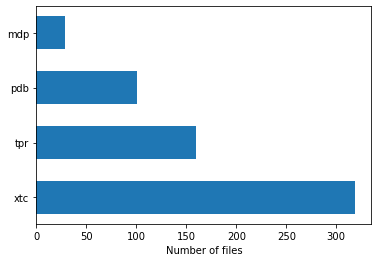

In [6]:
plt.barh(file_types.index, file_types.values, height=0.6)
plt.xlabel("Number of files")

## Average file size per file type (in Mo)

In [7]:
interest_df.groupby("type")["size"].mean()/(1024*1024)

type
mdp       0.002064
pdb     206.748547
tpr       1.179836
xtc    2159.645214
Name: size, dtype: float64